In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df= pd.read_csv('tweeter_disaster/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [17]:
missing_values= df.isnull().sum().sort_values(ascending= False)/len(df)
print(len(missing_values[missing_values>0]), 'are with missing values' )
print(missing_values[missing_values>0])

2 are with missing values
location    0.332720
keyword     0.008013
dtype: float64


In [18]:
df.sample(5)

,id,keyword,location,text,target
5529,7887,quarantined,NaN,Ebola: Alabama Home Quarantined Over Possible ...,1
87,129,accident,Maldives,RT nAAYf: First accident in years. Turning ont...,1
2213,3170,deluge,"Brackley Beach, PE, Canada",It's a deluge in Trois-Rivieres. About one hou...,0
2737,3935,devastated,Banbridge,'Er indoors will be devastated. RIP Arfur. #Ge...,1
3819,5428,first%20responders,New York City,I just added 'Sandy First Responders Lost Thei...,1


first need to fill na it looks as it should be a str type so with empty ''


In [19]:
{x:'' for x in list(df.columns)}

{'id': '', 'keyword': '', 'location': '', 'text': '', 'target': ''}

In [20]:
fillna_dict={'keyword': '', 'location': '', 'text': ''}

In [21]:
{x:'str' for x in list(df.columns)}

{'id': 'str',
 'keyword': 'str',
 'location': 'str',
 'text': 'str',
 'target': 'str'}

In [22]:
fill_astype_dict={ 'keyword': 'str',
 'location': 'str',
 'text': 'str',}

In [23]:
df= df.fillna(fillna_dict)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [25]:
df= df.astype(fill_astype_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [26]:
df.sample(7)

,id,keyword,location,text,target
4366,6201,hijacker,,Governor Allows Parole for School Bus Hijacker...,1
351,503,army,,One Direction Is my pick for http://t.co/q2eBl...,0
3016,4330,dust%20storm,,I learned more about economics from one South ...,1
6526,9334,survive,Trapped in my Conscience,Like it affects every level of life you're exp...,0
4857,6916,mass%20murderer,,You happen to conveniently 'forget' about how ...,1
3498,4998,explosion,"Long Island, NY",We found a sunflower explosion on our walk. ht...,1
7427,10625,wounded,,Officer wounded suspect killed in exchange of ...,1


In [27]:
list(df.columns)

['id', 'keyword', 'location', 'text', 'target']

In [28]:
# df= df.encode('utf-8', 'ignore').decode('utf-8')

for a in ['keyword', 'location', 'text']:
    df[a].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))

In [29]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [30]:
df['text_len']= df['text'].apply(lambda x: len(x))

In [31]:
df.sample(5)

,id,keyword,location,text,target,text_len
226,321,annihilated,the own zone layer,day 1 of tryouts went good minus the fact I st...,0,123
1699,2454,collided,Roanoke VA,Cyclist who collided with runner on Roanoke gr...,0,120
484,700,attacked,"Los Angeles, CA",@envw98 @NickCoCoFree @JulieDiCaro @jdabe80 I ...,0,127
7587,10841,,,Sirens everywhere!,0,18
3344,4788,evacuated,"Portland, Oregon",Evacuation orders lifted for Roosevelt in High...,1,114


In [32]:
df[(df['text_len']>7) &  (df['text_len']<120)  &  (df['keyword'].str.contains('hazard'))]

,id,keyword,location,text,target,text_len
4179,5935,hazard,,@ClassyColkett Thorgan Hazard made his move pe...,0,82
4180,5937,hazard,Australia,#Lifestyle Û÷It makes me sickÛª: Baby clothe...,0,115
4181,5938,hazard,,@LongBreastYat Yeah I don't think he's elite e...,0,108
4182,5939,hazard,"Alameda, CA",Choking Hazard Prompts Recall Of Kraft Cheese ...,1,76
4183,5942,hazard,"London, England",Seeing Hazard without the beard like... http:/...,0,62
4184,5943,hazard,Arizona,Get that hazard pay,0,19
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0,81
4187,5949,hazard,,Road Hazard @ CASCADE RD SW / CHILDRESS DR SW ...,0,68
4191,5954,hazard,,The Eden Hazard of Hockey https://t.co/RbbnjkoqUD,0,49
4192,5955,hazard,Chicago,CONFIRMED: Sanchez Hazard and Bolasie will be ...,1,101


In [33]:
df.describe()

,id,target,text_len
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


In [34]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [35]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1,1),
    max_df=0.9,
    min_df=2,
    max_features=10000,
    binary=False
)

lda = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=None,  #defaults to 1/n_components; called alpha
    n_jobs=-1,
    max_iter=50,
    random_state=2020
)

In [36]:
count_vec=count_vectorizer.fit_transform(df.text)

In [37]:
#  |  >>> X, _ = make_multilabel_classification(random_state=0)
#  |  >>> lda = LatentDirichletAllocation(n_components=5,
#  |  ...     random_state=0)
#  |  >>> lda.fit(X)

In [38]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(count_vec)
doc_vectors = lda.transform(count_vec)

In [66]:
lda.

In [67]:
log_likelihoods = [lda.score(d) for d in count_vec]

In [69]:
df["log_likelihood"] = log_likelihoods

In [71]:
df.sample(7)

,id,keyword,location,text,target,text_len,log_likelihood
2879,4139,drought,"Macon, Georgia",Moderate #drought is spreading rapidly across ...,1,130,-22248.953438
6677,9568,thunder,London,Okay maybe not as extreme as thunder and light...,0,116,-22238.216166
6100,8710,sinking,Canada,@AP \n Too slow report the sinking boat in the...,1,76,-22230.711164
2224,3182,deluge,USA,Audio: 16 Business Owners Share What They Woul...,0,89,-22214.879830
5640,8043,refugees,tripoli international airport,@KristinDavis @UN @Refugees Thank you @UN and ...,0,141,-22225.833597
863,1245,blood,,Can't believe more people in their mid 20's do...,1,116,-22246.760884
4124,5863,hailstorm,"Calgary, Canada",Sadly the tent fly did not survive this hailst...,1,137,-22252.377518


In [ ]:
df.plot.hist

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42,
        -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33,
        -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25, -0.24,
        -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16, -0.15,
        -0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
        -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
         0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,
         0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.

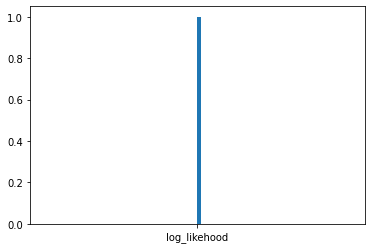

In [76]:
figsize=(15,5)
plt.hist(['log_likehood'], bins=100) / #tu zapomnialem of podaniu df 

In [ ]:
# to ok

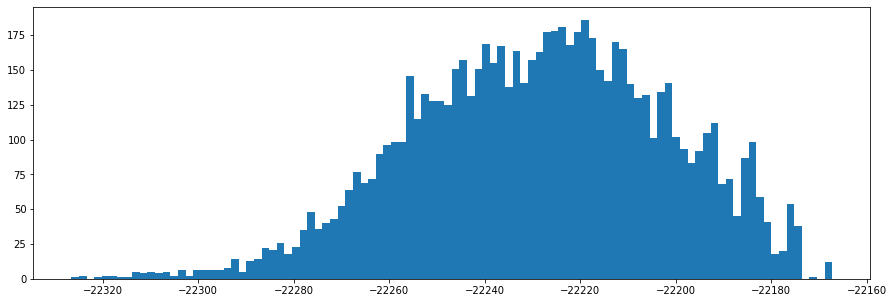

In [77]:
plt.figure(figsize=(15,5))
plt.hist(df["log_likelihood"], bins=100);

In [84]:
for a in df[df['log_likelihood']< -22300].text.sample(5).to_list():
    print(a)

USGS EQ: M 1.2 - 23km S of Twentynine Palms California: Time2015-08-05 23:54:09 UTC2015-08-05 16:... http://t.co/T97JmbzOBO #EarthQuake
2pcs 18W CREE Led Work Light  Offroad Lamp Car Truck Boat Mining 4WD FLOOD BEAM - Full reaÛ_ http://t.co/VDeFmulx43 http://t.co/yqpAIjSa5g
#Sismo DETECTADO #JapÌ_n [Report 3] 01:02:17 Okinawa Island region M3.8 Depth 10km Maximum seismic intensity 3 JST #??
Gunmen open fire on bus near El Salvador's capital killing 4 a week after gang attacks killed 8 bus drivers: http://t.co/Pz56zJSsfT bitÛ_
Baltimore City : I-95 NORTH AT MP 54.8 (FORT MCHENRY TUNNEL BORE 3: Collision: I-95 NORTH AT MP 54.8 (FORT MCHENRY TUNNEL BORE 3 Nort...


In [85]:
for a in df[df['log_likelihood']> -22260].text.sample(5).to_list():
    print(a)

The Twitter update pretty much wrecked the app
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/LjylxZ1fBi
Beastin Tapas this evening with some good folk! #funtimes #demolished http://t.co/JxUEPkmkRh
No civilian population ever deserves demolition may we never forget &amp; learn from our mistakes #Hiroshima
My precious olive tree lost this battle...another crazy windstorm in #yyc! @weathernetwork http://t.co/N00DVXEga2


In [88]:
text = """
    this is very simple text should be from thotaly different fable lest see
    what LDA would say.
"""
test_count_data = count_vectorizer.transform([text])
test_log_likelihood = lda.score(count_vec)

print(test_log_likelihood)

-489148.8739650735


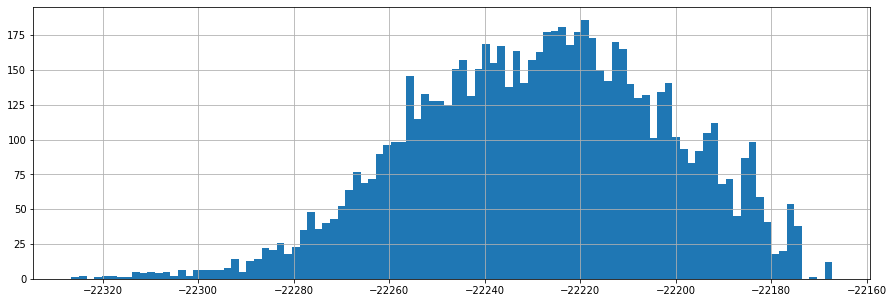

In [93]:
df.log_likelihood.hist(bins=100, figsize=(15,5));

# Split by character

In [ ]:
temp_table= data['Name'].str.split(" ", n=1, expand=True)
temp_table

In [ ]:
data['First Name']= temp_table[0]
data['Last Name']= temp_table[1]

In [ ]:
clean_dict={'%':''}

In [ ]:
df1= df1.replace(clean_dict, regex=True)

In [ ]:
df1.loc[2], df1.iloc[2]

# ast.literal.eval() to restore original data type

In [ ]:
df.ast.literal.eval()

In [ ]:
def read_harry_potter():
    lines = []
    with open("../input/harry_potter.txt", "r") as f:
        for line in f.readlines():
            line = line.replace("\n", " ")
            if line:
                lines.append(line)
                
    return "".join(lines)

In [ ]:
text=read_harry_potter()

In [ ]:
df['words_len'] = df['text'].map(lambda x: len(x))

for percentile in [50, 75, 90, 95, 98, 99, 100]:
    print(percentile, np.percentile(df['words_len'], percentile))
    
df['words_len'].hist(bins=50);

In [ ]:
df_light = df.sample(frac=0.1)

In [ ]:
df['Product'].value_counts()

In [ ]:
df['label'] = df['target']
df['target'] = df['target'].factorize()[0]
df['doc_id'] = df.index